In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [2]:
# generate ethene molecule
smiles = "C=C"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "ethene.xyz")

# import the package
from pyscf import gto, scf

mol = gto.M(atom="ethene.xyz")

# set basis set
mol.basis = "6-31G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run energy calculations
neutral_energy = mf.kernel()

/opt/homebrew/lib/python3.11/site-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -77.6167501638519


In [ ]:
# total number of electrons
n = mol.tot_electrons()
n

16

In [4]:
# display all orbitals
mf.mo_energy

array([-9.98868219, -9.98828492, -0.71607937, -0.53788474, -0.44467966,
       -0.35845419, -0.327403  , -0.21074797,  0.11348932,  0.40828965,
        0.42285591,  0.43970457,  0.63806545,  0.69045135])

In [5]:
# HOMO is n/2 orbital. But python index starts from 0
homo = mf.mo_energy[int(n/2) - 1]
homo

-0.21074797304612014

In [7]:
# the unit of energy is Hartree. To convert to eV
homo * 27.2114

-5.7347473937471936

In [ ]:
# import the definitions
from pyscf.tools import molden

# we will write the surface to molden files
with open('ethene.molden', 'w') as f1:
    molden.header(mol, f1)
    molden.orbital_coeff(mol, f1, mf.mo_coeff, ene=mf.mo_energy, occ=mf.mo_occ)

Exercise
Get the HOMO-LUMO gap in Benzene. Use B3LYP/3-21G level of theory

In [10]:
smiles = "C1=CC=CC=C1"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "ethene.xyz")

# import the package
from pyscf import gto, scf

mol = gto.M(atom="ethene.xyz")

# set basis set
mol.basis = "6-31G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run energy calculations
neutral_energy = mf.kernel()

converged SCF energy = -229.400816906692


In [11]:
n = mol.tot_electrons()
n

42

In [15]:
mf.mo_energy

array([-10.00806457, -10.00715063, -10.00657434, -10.00532893,
       -10.00442119, -10.00320372,  -0.81374189,  -0.70713645,
        -0.70271936,  -0.56538303,  -0.55899946,  -0.48769704,
        -0.42288592,  -0.40029194,  -0.3850316 ,  -0.3754212 ,
        -0.32089452,  -0.30258537,  -0.29436314,  -0.20020897,
        -0.19667671,   0.0913484 ,   0.09552303,   0.26302458,
         0.34014549,   0.39040605,   0.4048163 ,   0.46700911,
         0.48223496,   0.48465039,   0.59222903,   0.59763832,
         0.60923365,   0.63217732,   0.77743131,   0.8334736 ])

In [ ]:
homo = mf.mo_energy[int(n/2) - 1]
homo

-0.19667671188001373

In [14]:

lumo = mf.mo_energy[int(n/2)]
lumo

0.09134839776687778

In [16]:
lumo - homo

0.28802510964689154

In [17]:

# Run single-point energy for cation of ethene

# import the package
from pyscf import gto, scf

mol = gto.M(atom="ethene.xyz")

# set basis set
mol.basis = "6-31G"

########## SET CHARGE ################
mol.charge = 1
mol.spin = 1  #  (2*s) where s is the spin. some code use 2*s +1
#####################################

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run energy calculations
cation_energy = mf.kernel()
     

converged SCF energy = -229.104631083168  <S^2> = 0.76706995  2S+1 = 2.0169977


In [18]:
# ionization is the difference in energies
# we convert to eV
( neutral_energy - cation_energy ) * 27.2114

-8.05963091823359

Exercise
Compute the electron affinity of benzene at B3LYP/3-21G level of theory.

Hint: electron affinity is energy required to add electron to system

In [19]:
mol = gto.M(atom="ethene.xyz")

# set basis set
mol.basis = "6-31G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# set solvent
mf = mf.DDCOSMO()
mf.with_solvent.eps = 35.688  # Acetonitrile

# run single point energy
mf = mf.run()

#get total energy
neutral_energy_solvent = mf.e_tot

converged SCF energy = -229.401909654928


In [20]:

# estimate of solvation enthalpy in eV
(neutral_energy_solvent - neutral_energy ) * 27.2114

-0.02973520934070773

In [21]:
from pyscf import gto, scf, dft, tddft

mol = gto.M(atom="ethene.xyz")

# set basis set
mol.basis = "6-31G"

# set DFT functional
mf = dft.RKS(mol)
mf.xc = 'b3lyp'


################## SELECT ONE ################

# initialize the mf object in gas phase
# mf.kernel()

# OR

# initialize the mf object in solvent
mf = mf.DDCOSMO()
mf.with_solvent.eps = 35.688  # Acetonitrile
mf = mf.run()

##################################################

# setup the TDDFT 
td = tddft.TDDFT(mf)

# set type and number of states required
td.singlet = True
td.nstates = 10

# run TDDFT
td.kernel()

# analyze to show a table of excitations
td.analyze()
     

converged SCF energy = -229.401909654928
TD-SCF states [0, 1, 2, 3, 5, 6, 7, 8, 9] not converged.
Excited State energies (eV)
[0.08418119 3.83483947 4.52474448 5.42374319 6.55864484 6.63250367
 7.14424538 7.38516489 7.48598615 7.87799564]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      0.08418 eV  14728.25 nm  f=0.0001
Excited State   2:      3.83484 eV    323.31 nm  f=0.0011
Excited State   3:      4.52474 eV    274.01 nm  f=0.0013
Excited State   4:      5.42374 eV    228.60 nm  f=0.0006
Excited State   5:      6.55864 eV    189.04 nm  f=0.0003
Excited State   6:      6.63250 eV    186.93 nm  f=0.0029
Excited State   7:      7.14425 eV    173.54 nm  f=0.0066
Excited State   8:      7.38516 eV    167.88 nm  f=0.0001
Excited State   9:      7.48599 eV    165.62 nm  f=0.0021
Excited State  10:      7.87800 eV    157.38 nm  f=0.0017


In [23]:

# helper function to plot absorption spectrum
def plot_absorption(td_obj, step=0.01, sigma=0.05):
    import scipy.constants as cst
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt

    # get transitions can convert to eV
    transitions =  td_obj.e * 27.2114

    # get oscilator strengths
    f = td_obj.oscillator_strength()

    # get minimum and miximum x-values for plot 
    minval = min([val for val in transitions]) - 5.0 * sigma
    maxval = max([val for val in transitions]) + 5.0 * sigma

    # number of data points in line
    npts = int((maxval - minval) / step) + 1

    # generating the plot
    eneval = np.linspace(minval, maxval, npts)  # in eV
    lambdaval = [cst.h * cst.c / (val * cst.e) * 1.e9
                 for val in eneval]  # in nm

    # sum of gaussian functions
    spectra = np.zeros(npts)
    for i in range(len(transitions)):
        spectra += f[i] * norm.pdf(eneval, transitions[i], sigma)
    spectra /= spectra.max()

    # plot the spectrum
    plt.plot(lambdaval,spectra)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorption (au)")
     

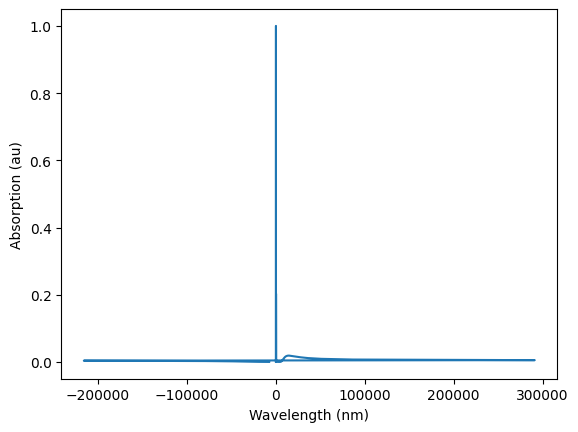

In [24]:
# plot the absorption from td
plot_absorption(td)